# Графическая оценка генераторов псевдослучайных чисел

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [2]:
plt.style.use('../../iPyNotebook/default_colors.mplstyle')

1.  `LCG` — линейный конгруэнтный метод
2.  `LCG2` — комбинация двух линейных конгруэнтных методов
3.  `LFG` — запаздывающий генератор Фибоначчи (Lagged Fibonacci Generator)
4.  `xorshift*`
5.  `xorshift+`
6.  `xorshift`
7.  Mersenne Twister
8.  `kiss`
9.  `jkiss`
10. `ICG` — инверсный конгруэнтный генератор
11. нормальный генератор
12. экспоненциальный генератор
13. генератор распределения Пуассона
14. генератор процесса Винера
15. генератор процесса Пуассона

## Графические тесты

Графические тесты позволяют оценить насколько полученная последовательность псевдослучайных чисел является независимо распределенной

- График последовательности (Sequence plot).
- График лага (Lag-plot).
- График автокорреляции в зависимости от лага (auto-correlation function plot, ACF-plot)

In [3]:
! make
! ./bin/test 11 10

-e Компилируется файл: '' src/kiss.c ''
-e Компилируется файл: '' src/normal.c ''
-e Компилируется файл: '' src/lfg.c ''
-e Компилируется файл: '' src/xorshift.c ''
-e Компилируется файл: '' src/exponential.c ''
-e Компилируется файл: '' src/processes.c ''
-e Компилируется файл: '' src/devrandom.c ''
-e Компилируется файл: '' src/lcg.c ''
-e Компилируется файл: '' src/mt.c ''
-e Компилируется файл: '' src/icg.c ''
-e Компилируется файл: '' src/poisson.c ''
gcc -shared ./lib/kiss.o ./lib/normal.o ./lib/lfg.o ./lib/xorshift.o ./lib/exponential.o ./lib/processes.o ./lib/devrandom.o ./lib/lcg.o ./lib/mt.o ./lib/icg.o ./lib/poisson.o -o ./lib/librandomgen.so  -lm
gcc -L./lib -Wl,-rpath=./lib -Wall ./tools/test.c -o ./bin/test -lrandomgen
1.1193205869044317918   
1.3011145510326544396   
0.47523291234166471216  
-2.0861148274615889399  
1.0406669714912326319   
0.23249301574787490471  
-0.27196750664146551144 
0.62022940751745746631  
-0.47288629752186887436 
0.79287819724178302481  


Запускаем генераторы

In [4]:
generator = 7
N = 10**6

cmd = ['./bin/test', str(generator), str(N)]
print(' '.join(cmd))

./bin/test 7 1000000


In [5]:
out1 = subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode().split('\n')
# rnd1 = np.array(out1[:-1], dtype=np.float64)
rnd1 = np.array(out1[:-1], dtype=np.uint64)

In [6]:
# Симулируем «плохой» генератор случайных чисел
bad = rnd1 % 25

In [7]:
# Нормуруем полученную последовательность
rnd1 = rnd1 / np.max(rnd1)

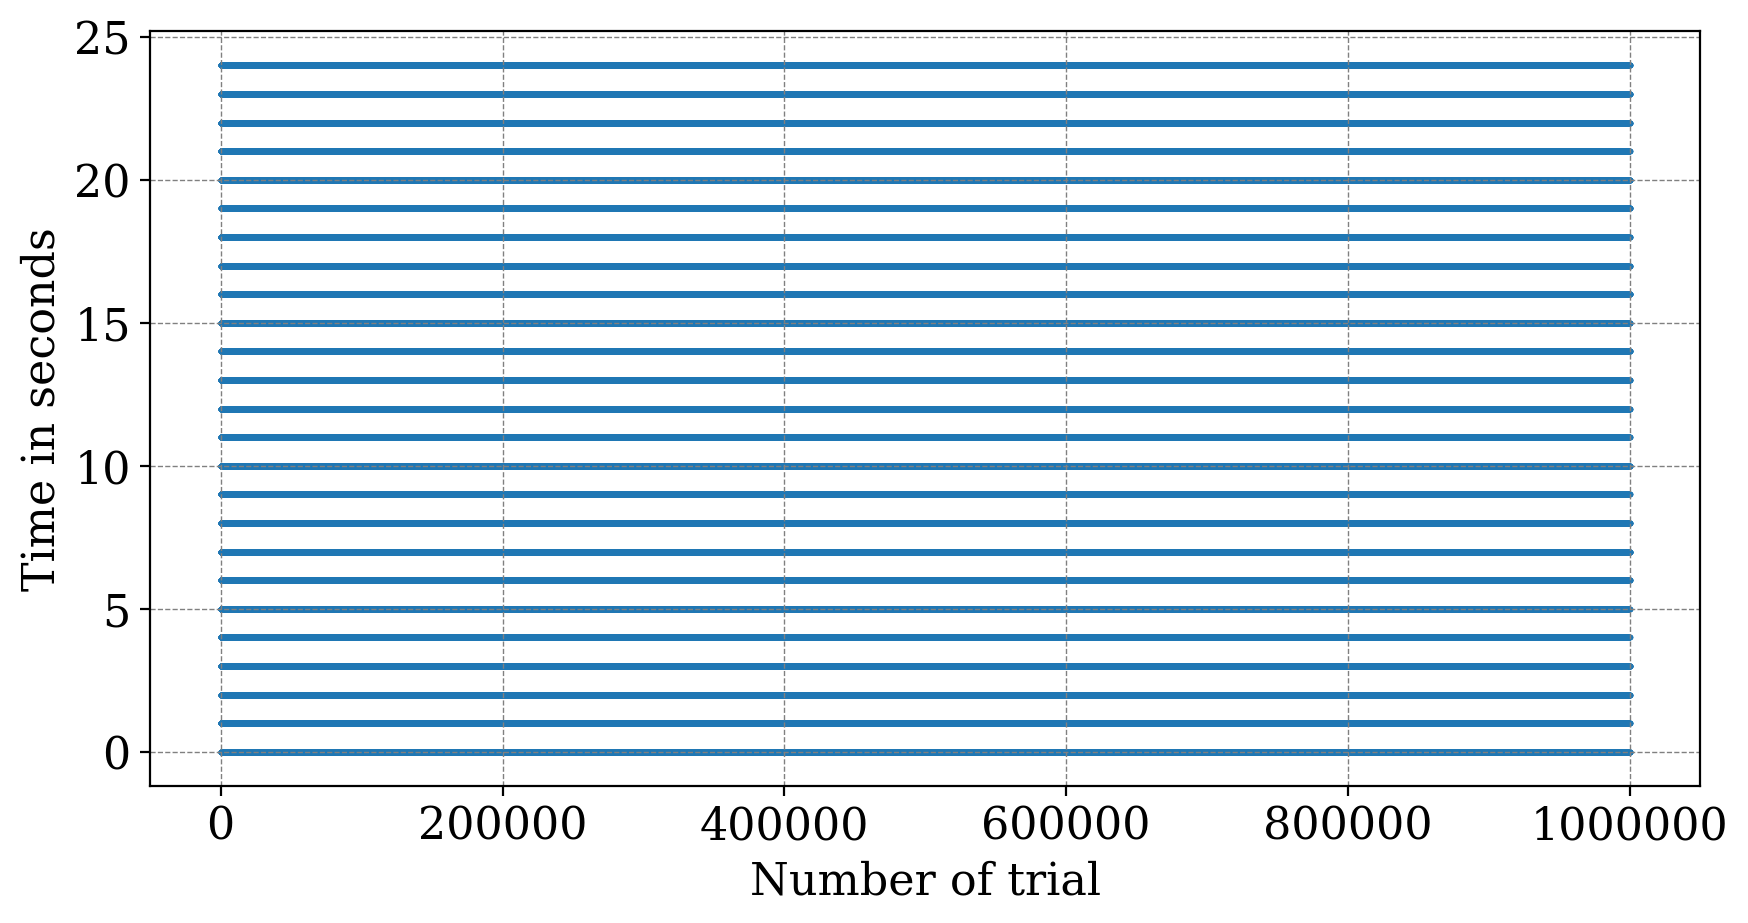

In [8]:
fig01 = plt.figure(1, figsize=(10, 5))
ax01 = fig01.add_subplot(1, 1, 1)

Ns = np.arange(0, len(rnd1))

ax01.scatter(Ns, bad, s=1)
# ax01.scatter(Ns, rnd1, s=1)

ax01.set_xlabel('Number of trial')
ax01.set_ylabel('Time in seconds')

fig01.savefig('sequence_plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

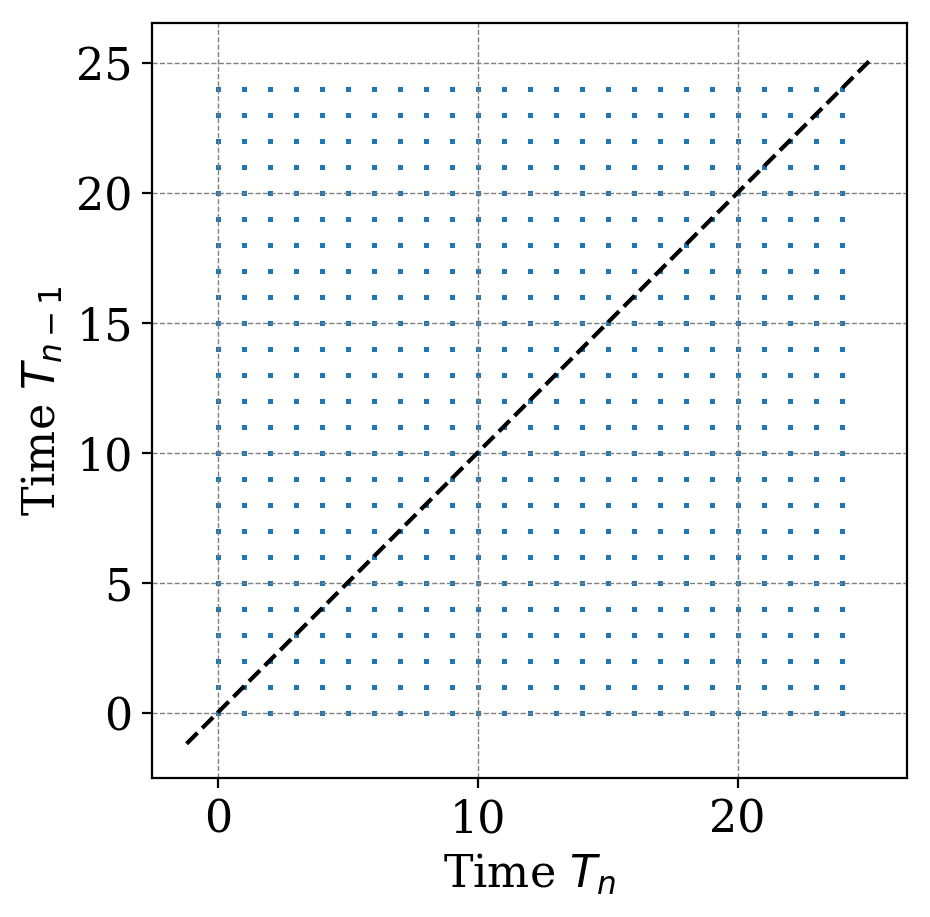

In [9]:
fig02 = plt.figure(2, figsize=(5, 5))
ax02 = fig02.add_subplot(1, 1, 1)

ax02.set_aspect('equal')

# ax02.scatter(rnd1[1:], rnd1[:-1], s=0.5)
ax02.scatter(bad[1:], bad[:-1], s=0.5)

ax02.plot(ax02.get_xlim(), ax02.get_ylim(), color='black', ls='--')
ax02.set_xlabel('Time $T_{n}$')
ax02.set_ylabel('Time $T_{n-1}$')

fig02.savefig('lag_plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

In [10]:
def acorr(data, lag: int):
    """Автокорреляция массива `data` лагом `lag`"""
    if lag == 0:
        res = 1
    else:
        μ, σ2 = np.mean(data[:-lag]), np.var(data[:-lag])
        res = np.mean((data[:-lag] - μ) * (data[lag:] - μ)) / σ2
    return res

In [11]:
lags = np.arange(1, 150, 1)
acorrs = [acorr(rnd1, lag) for lag in lags]
bad_acorrs = [np.sin(lag) + np.cos(lag) for lag in lags]

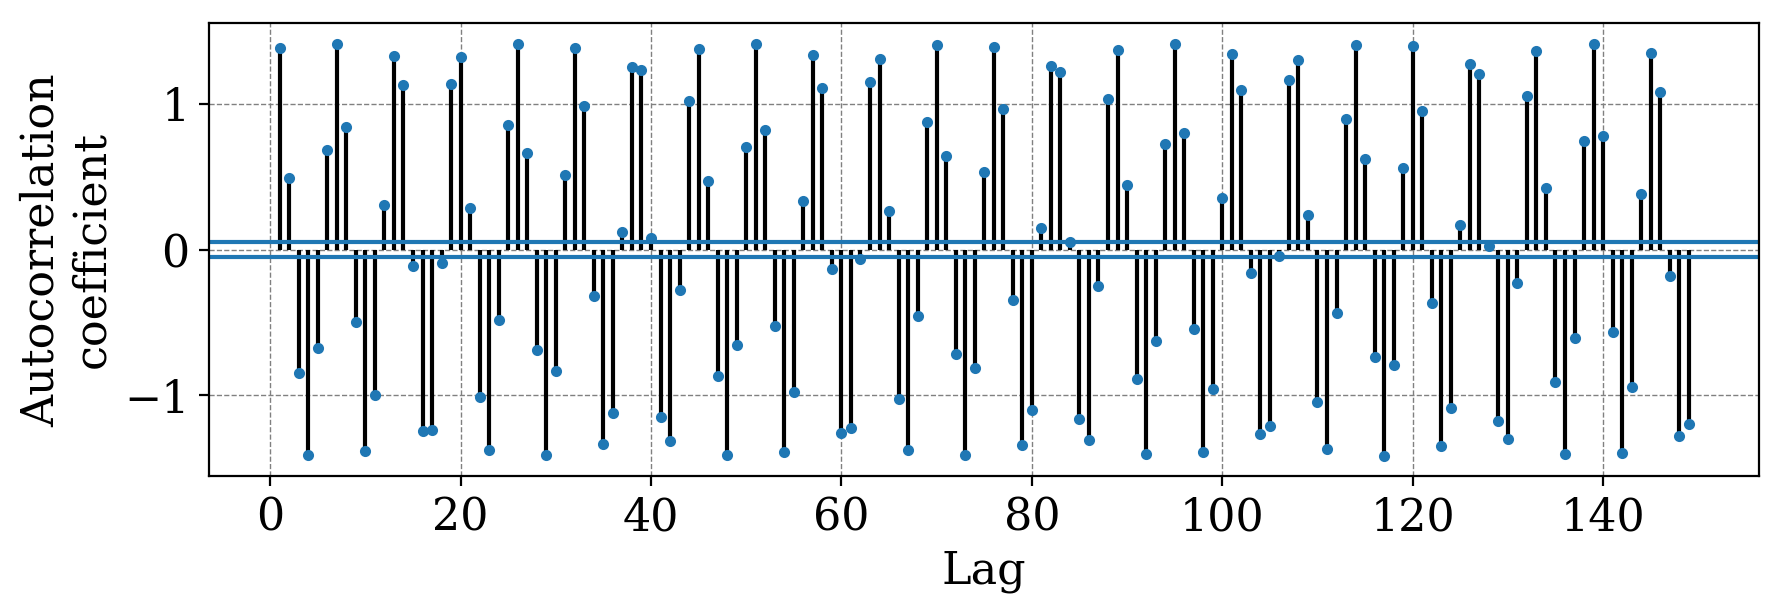

In [12]:
fig03 = plt.figure(1, figsize=(10, 3))
ax03 = fig03.add_subplot(1, 1, 1)

# ax03.vlines(lags, 0, acorrs)
ax03.vlines(lags, 0, bad_acorrs)

# ax03.plot(lags, acorrs, marker='o', ls='None')
ax03.plot(lags, bad_acorrs, marker='o', ls='None')

ax03.axhline(y=0.05)
ax03.axhline(y=-0.05)

ax03.set_xlabel('Lag')
ax03.set_ylabel('Autocorrelation\ncoefficient')

fig03.savefig('acf_plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0)